In [127]:
# ALl imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv('datasets/Project_Dataset.csv')
#df.shape

In [128]:
#df = df.sample(frac=0.5, replace=False, random_state=42)
#df.shape

In [129]:
categorical_list = pd.read_csv('datasets/VehiclesInformation.csv').columns.tolist()
numerical_list = pd.read_csv('datasets/Measurments_in_SENDTIME.csv').columns.tolist()

# Jespers adaption to categorical_df and numerical values
#float_cols = [key for key,val in df.dtypes.items() if val == 'float64']
#int_cols = [key for key,val in data.dtypes.items() if val == 'int64']
#not_float_cols = [key for key in float_cols if sum(data[key].apply(lambda i:i.is_integer())) == sum(~data[key].isna())]
#float_cols = [col for col in float_cols if col not in not_float_cols]

In [130]:
df.describe()

,Sample_ID,Charge_mode_DISTANCE,Vehicle_ID,Operation_TIME,Operation_DISTANCE,Sender,Gear_Level_Auto_Time,Gear_Level_Man_Time,Total_Distance,Brake_Time,Cruise_Time,Drive_Distance,Drive_Fuel,Drive_Time,Idle_Fuel,Coasting_Time,Econ_Time,Idle_Time,Key_On_Time,Pedal_Time,measure35,measure36,measure37,measure38,measure39,measure40,measure41,measure42,measure43,measure44,measure45,measure46,measure47,measure48,measure49,Measure_G-1_Time,State_Of_Health_Battery,Diesel_Mode_Total_Fuel,measure50,measure51,Measure_3,Electric_Mode_Time,Hybrid_Mode_Time,Charge_Mode_Time,Diesel_Mode_Time,Total_Time,Electric_Mode_Distance,Hybrid_Mode_Distance,Diesel_Mode_Distance,Total_Distance__ElectricHybridDiesel,Battery_Version,Battery_Generation,Fleet_ID,Country,Vehicle_MRK_TYPE,EMISSION_LEVEL,CURRENT_YEARLY_MILEAGE,Measure_2,Active_Charge,Mounted_Battery_Generation,Measure_1,Measure_R_D,Engine_Type,Geo_Area,City,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier
count,8.619160e+05,238078.0,861916.000000,861815.000000,826697.000000,861916.000000,109882.000000,109906.00000,798851.000000,278583.000000,202469.000000,506445.000000,5.032910e+05,536956.000000,503274.000000,181441.000000,161594.000000,788100.000000,532004.000000,181251.000000,202294.000000,181269.000000,161567.000000,424111.000000,427152.000000,133646.000000,661906.000000,661922.000000,465493.000000,473534.000000,445570.000000,467305.000000,467216.000000,465362.000000,467094.000000,1.612370e+05,213860.000000,225385.000000,271163.000000,2.656360e+05,3.006480e+05,6.545090e+05,654104.000000,6.544760e+05,6.329780e+05,6.309890e+05,617031.000000,659976.000000,660637.000000,615662.000000,861916.000000,836463.000000,723818.000000,861915.000000,861916.000000,861916.000000,861916.00000,646879.000000,29631.000000,861837.000000,750973.000000,774348.000000,725789.000000,724928.000000,713059.000000,568613.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,836463.000000
mean,1.605535e+08,0.0,914.695734,8950.790168,168684.138197,1.833639,6954.796127,0.02447,168093.327635,93.198303,2.318812,155092.674399,2.249406e+05,5370.606848,16964.597799,1178.372773,2942.647370,2422.450477,9982.880151,1569.209152,0.051096,46.385956,615.662478,0.901495,7573.258953,9.649170,169547.478055,61.481415,6781.350173,4809.420994,9.675092,2333.207444,0.275380,1476.301991,25.018116,9.916824e+02,82.849888,211.315261,2916.653578,2.188812e+03,2.200109e+06,2.559039e+03,9380.684591,3.872595e+01,1.705938e+01,1.219556e+04,6799.205918,186747.229050,68.730186,196896.154366,0.102657,1.746087,54.372580,4.280604,2.733117,1.330508,5.07670,1.085858,1.018157,1.700433,3.177602,11.733245,1.392464,1.224586,14.587535,2.591699,2017.983685,0.195157,0.047081,0.200031,0.344520,0.002894,0.042605,1.687913
std,1.040139e+08,0.0,907.401415,5888.556969,106473.041228,0.477447,6005.307955,2.41849,105243.858682,954.888471,677.038889,105134.455727,1.445176e+05,3587.547315,17560.201651,985.907388,2673.787443,2104.067300,6492.809635,1314.868734,13.441627,88.894753,1024.787936,23.071409,6860.789614,191.788297,106832.459806,129.885507,4535.185180,3429.560190,14.701637,1594.781897,2.416467,1208.234013,29.612928,9.885296e+03,13.765894,352.474578,2162.156577,2.528516e+03,1.608684e+06,2.062436e+03,5624.617100,1.475055e+03,1.499661e+03,7.896164e+03,6854.103732,104558.643889,148.490047,105712.507731,0.321870,1.073060,52.836068,4.214571,1.601607,0.470396,4.04253,0.280155,0.133520,0.979034,2.856095,15.647778,0.488367,0.806776,18.446428,1.489970,1375.534256,0.396322,0.211813,0.400024,0.475212,0.053714,0.201965,0.928517
min,1.673760e+06,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [131]:
df.dtypes

Sample_ID                                 int64
Charge_mode_DISTANCE                    float64
SEND_TIME                                object
Vehicle_ID                                int64
Operation_TIME                          float64
Operation_DISTANCE                      float64
Sender                                    int64
Gear_Level_Auto_Time                    float64
Gear_Level_Man_Time                     float64
Total_Distance                          float64
Brake_Time                              float64
Cruise_Time                             float64
Drive_Distance                          float64
Drive_Fuel                              float64
Drive_Time                              float64
Idle_Fuel                               float64
Coasting_Time                           float64
Econ_Time                               float64
Idle_Time                               float64
Key_On_Time                             float64
Pedal_Time                              

# Frequently used functions

In [132]:
def applyPlotPatches(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=10,
                       xytext = (0, 30), 
                       textcoords = 'offset points',
                       rotation=90)
        
def sns_Settings(title, x_label=None, y_label=None, perc_threshold=None,rotation=0, splot=None):
    plt.title(title)
    plt.ylabel(y_label)
    
    if perc_threshold: plt.axhline(perc_threshold,c="white",lw=3)
    if splot: applyPlotPatches(splot)
    plt.xticks(rotation=rotation)

In [133]:
df.isna().mean().head()

Sample_ID               0.000000
Charge_mode_DISTANCE    0.723781
SEND_TIME               0.001950
Vehicle_ID              0.000000
Operation_TIME          0.000117
dtype: float64

# Missing values in columns

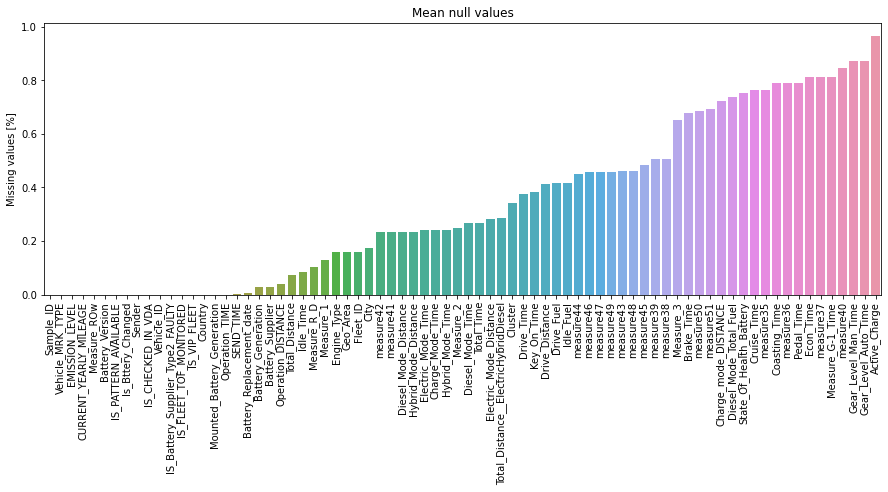

In [134]:
# Find threshold for NULL
perc_threshold = 0.99
df_mean_null_temp = df.isna().mean().sort_values()
# print("Mean of null values:", df_mean_null.sort_values())
# TODO group in classes to see number of missing values

plt.figure(figsize=(15,5))
splot = sns.barplot(x=df_mean_null_temp.index, y=df_mean_null_temp.values)
sns_Settings(f"Mean null values", 
             None, 
             "Missing values [%]",
             rotation=90,
            )
plt.show()
del df_mean_null_temp

# Unique values in each column

In [135]:
df_temp = df.nunique().sort_values()

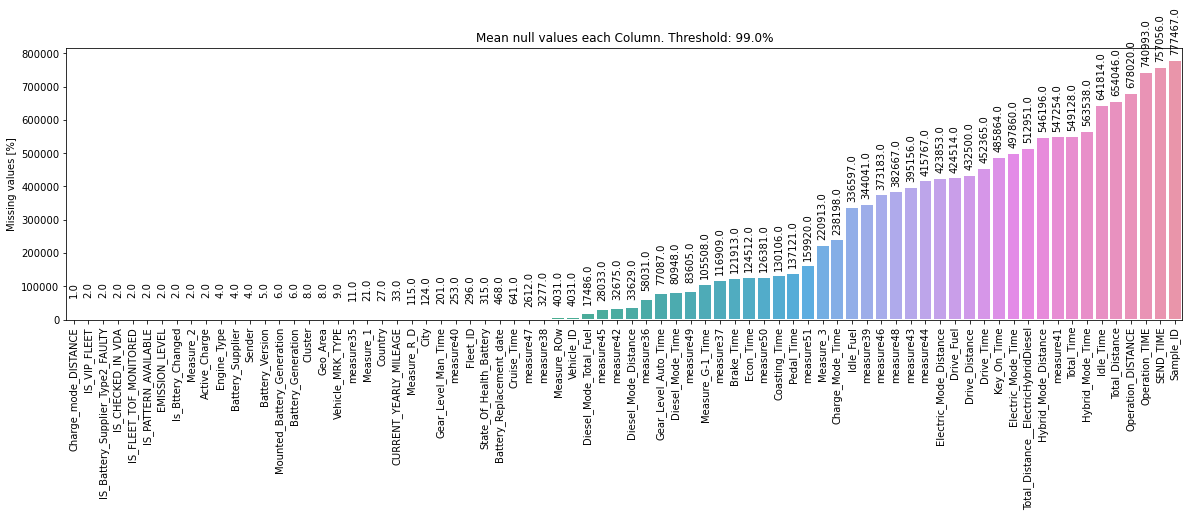

In [136]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

splot=sns.barplot(x=df_temp.index,y=df_temp.values)
sns_Settings(f"Mean null values each Column. Threshold: {perc_threshold*100}%", 
             None, 
             "Missing values",
             perc_threshold=perc_threshold,
             rotation=90,
             splot=splot
            )
del df_temp

# Distribution of data in columns

In [137]:
temp_drop_items = ["SEND_TIME","Battery_Replacement_date"]
temp_df = df[[col for col in numerical_list if col not in temp_drop_items]].head()

temp_df=(temp_df-temp_df.mean())/temp_df.std()

temp_df[:10]


,Sample_ID,Charge_mode_DISTANCE,Vehicle_ID,Operation_TIME,Operation_DISTANCE,Sender,Gear_Level_Auto_Time,Gear_Level_Man_Time,Total_Distance,Brake_Time,Cruise_Time,Drive_Distance,Drive_Fuel,Drive_Time,Idle_Fuel,Coasting_Time,Econ_Time,Idle_Time,Key_On_Time,Pedal_Time,measure35,measure36,measure37,measure38,measure39,measure40,measure41,measure42,measure43,measure44,measure45,measure46,measure47,measure48,measure49,Measure_G-1_Time,State_Of_Health_Battery,Diesel_Mode_Total_Fuel,measure50,measure51,Measure_3,Electric_Mode_Time,Hybrid_Mode_Time,Charge_Mode_Time,Diesel_Mode_Time,Total_Time,Electric_Mode_Distance,Hybrid_Mode_Distance,Diesel_Mode_Distance,Total_Distance__ElectricHybridDiesel
0,1.113492,NaN,NaN,1.106589,1.365405,-0.447214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.407151,NaN,NaN,-0.401830,0.270074,-0.447214,NaN,NaN,-0.127823,-0.137562,NaN,-0.134803,1.089553,-0.151207,0.930046,1.110469,1.129609,-0.232396,-0.162395,1.141978,NaN,-0.346167,1.041798,NaN,0.785403,NaN,0.790043,1.103628,0.803007,0.796695,0.777061,0.798238,NaN,0.803605,0.817167,1.138082,-0.738672,-0.192417,NaN,NaN,-0.299098,0.798238,0.798653,0.817171,0.776851,0.798683,0.785403,0.790742,1.103628,0.790528
2,1.003137,NaN,NaN,1.042219,-0.072423,1.788854,NaN,NaN,1.449145,1.451633,NaN,1.449933,NaN,1.454614,NaN,NaN,NaN,1.468395,1.456812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436540,NaN,NaN,1.471676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.106653,NaN,NaN,-0.843437,-1.428023,-0.447214,NaN,NaN,-0.587531,-0.584768,NaN,-0.571714,-0.213634,-0.574895,0.127650,-0.281110,-0.357469,-0.504063,-0.564838,-0.422950,NaN,1.127089,-0.089630,NaN,-1.125748,NaN,-1.124318,-0.845928,-1.120103,-1.122197,-1.128214,-1.121692,NaN,-1.119900,-1.115109,-0.399992,1.137954,-0.371655,NaN,NaN,-0.417113,-1.121692,-1.121556,-1.115108,-1.128275,-1.121546,-1.125748,-1.124100,-0.845928,-1.124167
4,-0.602825,NaN,NaN,-0.903542,-0.135033,-0.447214,NaN,NaN,-0.733791,-0.729303,NaN,-0.743415,-0.875919,-0.728513,-1.057696,-0.829359,-0.772140,-0.731935,-0.729579,-0.719027,NaN,-0.780922,-0.952168,NaN,0.340345,NaN,0.334275,-0.257700,0.317096,0.325502,0.351154,0.323454,NaN,0.316295,0.297942,-0.738089,-0.399282,-0.872468,NaN,NaN,-0.755465,0.323454,0.322903,0.297936,0.351424,0.322863,0.340345,0.333358,-0.257700,0.333639


Start plotting!


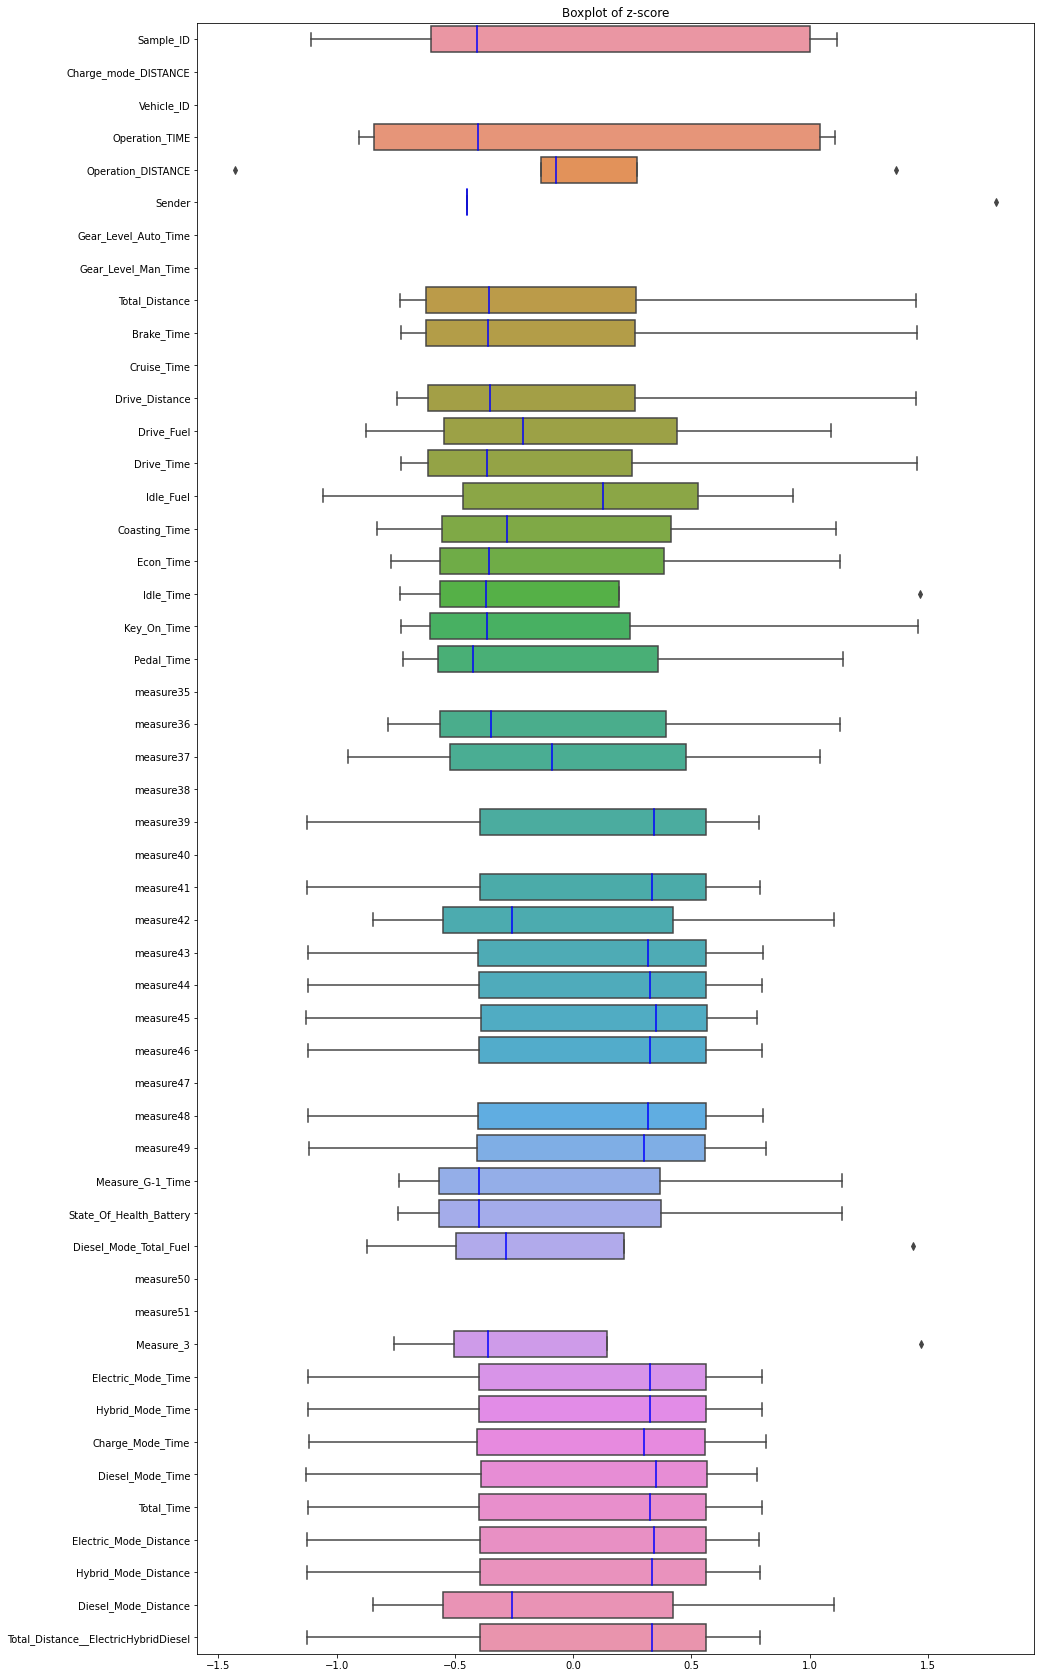

In [138]:
fig = plt.figure(figsize=(15,30))
print("Start plotting!")
#sns.boxplot(x="value", y="variable", data=pd.melt(temp_df), ci=None)
sns.boxplot(data=temp_df, orient="h", medianprops={'color':'blue'})
sns_Settings(f"Boxplot of z-score")

# Correlation matrix

<AxesSubplot:>

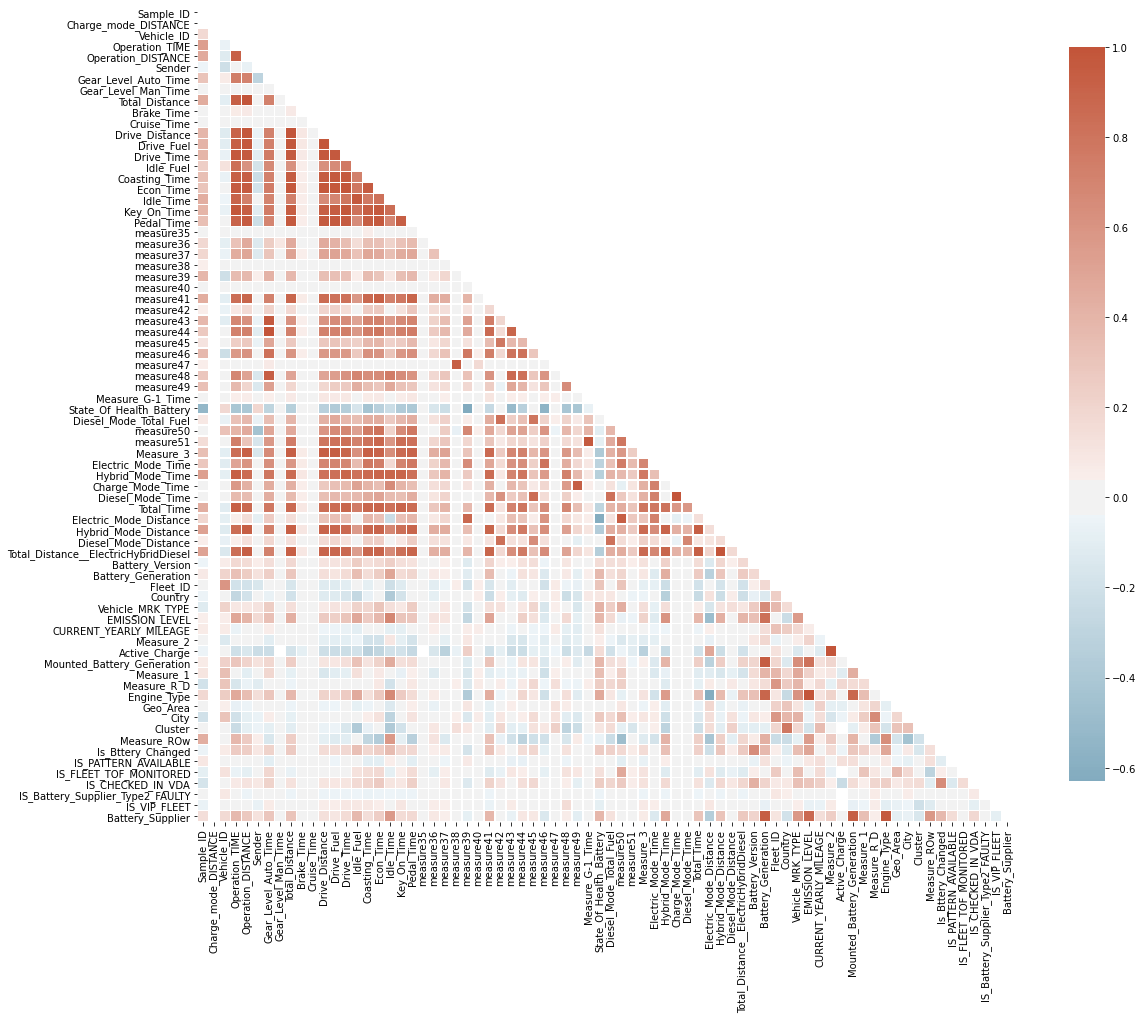

In [139]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidth=0.5,cbar_kws={"shrink": .9})

## Which features is under 5 in sum of correlation

In [140]:
correlation_min_limit = 5
cond = corr.abs().sum().sort_values()
correlation_min_df = cond.loc[cond > correlation_min_limit]
print(f"Features with less correlation than {5}: {correlation_min_df}")

Features with less correlation than 5: Measure_G-1_Time                         5.633212
CURRENT_YEARLY_MILEAGE                   6.043931
Geo_Area                                 6.194948
Sender                                   6.828086
IS_FLEET_TOF_MONITORED                   7.322221
Measure_2                                7.559247
Vehicle_ID                               8.157503
Measure_R_D                              8.870240
Battery_Version                          9.301360
Measure_1                                9.444233
Diesel_Mode_Distance                     9.592978
Country                                 10.036203
City                                    10.128644
measure42                               10.265511
IS_CHECKED_IN_VDA                       10.418386
Fleet_ID                                10.421482
Cluster                                 10.508234
Active_Charge                           11.370702
measure36                               12.586244
Is_Bttery_C

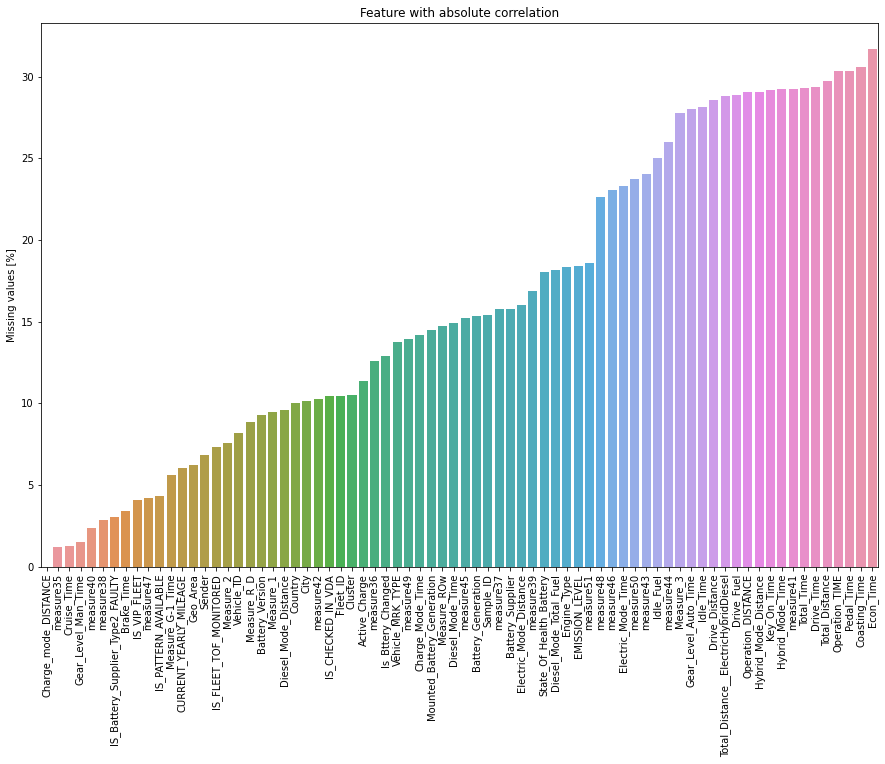

In [141]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)

splot=sns.barplot(x=cond.index,y=cond.values)
sns_Settings(f"Feature with absolute correlation", 
             None, 
             "Missing values [%]",
             rotation=90,
            )

# Check Timeseries

In [142]:
df['SEND_TIME'].head()
# Graph for: years, month, days, hours, minutes
sns.bar()

AttributeError: module 'seaborn' has no attribute 'bar'

# Other

In [ ]:
# Classes?

# Numerical?

# Throwable
Sample_ID

# Too many missing values

